## ***Loading Trades and Quotes & Visualizing Prilimanaries***

,Count,TradeType
0,16867742,Quotes
1,2297586,Trades


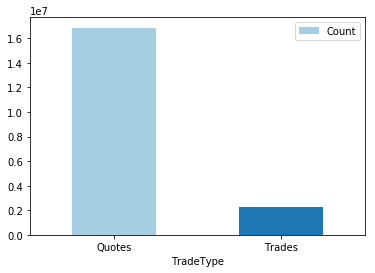

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_quotes = "C:/Users/HP/Documents/StocksAnalysis&Prediction/quotes.csv"
path_trades = "C:/Users/HP/Documents/StocksAnalysis&Prediction/trades.csv"

quotes_df = pd.read_csv(path_quotes)
trades_df = pd.read_csv(path_trades)

quotes_count = quotes_df.shape[0]
trades_count = trades_df.shape[0]

trade_type = ["Quotes","Trades"]
trade_counts = [quotes_count,trades_count]
StocksData = pd.DataFrame({'TradeType': trade_type, 'Count': trade_counts})
StocksData.plot.bar(x='TradeType', y='Count', rot=0,color=plt.cm.Paired(np.arange(2)))
StocksData.head()

# ***Quotes Analysis***

In [67]:
quotes_df.head(10)

,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,SYM_ROOT,SYM_SUFFIX
0,20200224,4:00:00.055043225,P,17.63,1,0.00,0,AAL,NaN
1,20200224,4:00:00.055043398,P,17.63,1,35.00,4,AAL,NaN
2,20200224,4:00:00.055139175,P,17.63,1,30.39,1,AAL,NaN
3,20200224,4:00:00.055323354,P,17.63,1,30.00,10,AAL,NaN
4,20200224,4:00:00.055323557,P,21.62,2,30.00,10,AAL,NaN
5,20200224,4:00:00.055323721,P,22.44,1,30.00,10,AAL,NaN
6,20200224,4:00:00.055413595,P,24.60,1,30.00,10,AAL,NaN
7,20200224,4:00:00.055638282,P,25.00,1,30.00,10,AAL,NaN
8,20200224,4:00:00.055638466,P,25.00,1,29.20,3,AAL,NaN
9,20200224,4:00:00.055897761,P,26.08,1,29.20,3,AAL,NaN


## ***1. Distribution of Quotes Per Company***

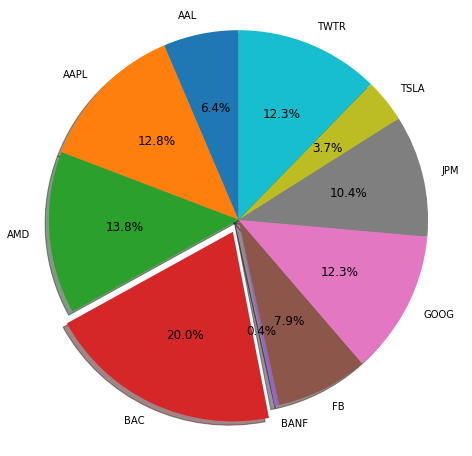

,company,stocks_count,stocks_percentage
0,AAL,1081231,6.410052
1,AAPL,2156593,12.785309
2,AMD,2333087,13.831650
3,BAC,3377314,20.022324
4,BANF,66050,0.391576
5,FB,1326960,7.866850
6,GOOG,2071950,12.283505
7,JPM,1751197,10.381929
8,TSLA,628555,3.726373
9,TWTR,2074805,12.300431


In [8]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from __future__ import division

quotes_distribution = pd.DataFrame(quotes_df.groupby("SYM_ROOT").size())
quotes_distribution.reset_index(level=0, inplace=True)
quotes_distribution.columns = ["company","stocks_count"]
quotes_distribution["stocks_percentage"] = quotes_distribution["stocks_count"].apply(lambda q : (100*q/quotes_df.shape[0]))

explode = (0, 0, 0,0.07,0,0,0,0,0,0) 
fig_dims = (8, 8)
fig1, ax1 = plt.subplots(figsize=fig_dims)
ax1.pie(quotes_distribution['stocks_percentage'].values, explode=explode, labels=quotes_distribution['company'].values, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 12})
ax1.axis('equal') 

plt.show()

quotes_distribution.head(15)

## ***2. Distribution of Quotes Per Exchange***

,exchange,exchange_count,exchange_name,exchange_percentage
0,A,448473,NYSE MKT LLC,3.0
1,B,448419,"NASDAQ OMX BX, Inc.",3.0
2,C,615647,National Stock Exchange Inc. (NSX),4.0
3,J,1004999,"Bats EDGA Exchange, INC",6.0
4,K,1573191,"Bats EDGX Exchange, Inc.",9.0
5,M,186802,"Chicago Stock Exchange, Inc. (CHX)",1.0
6,N,2035655,New York Stock Exchange LLC,12.0
7,P,1992581,"NYSE Arca, Inc.",12.0
8,Q,2236796,"NASDAQ Stock Exchange, LLC (in Tape C securities)",13.0
9,T,1594612,"NASDAQ Stock Exchange, LLC (in Tape A, B secur...",9.0


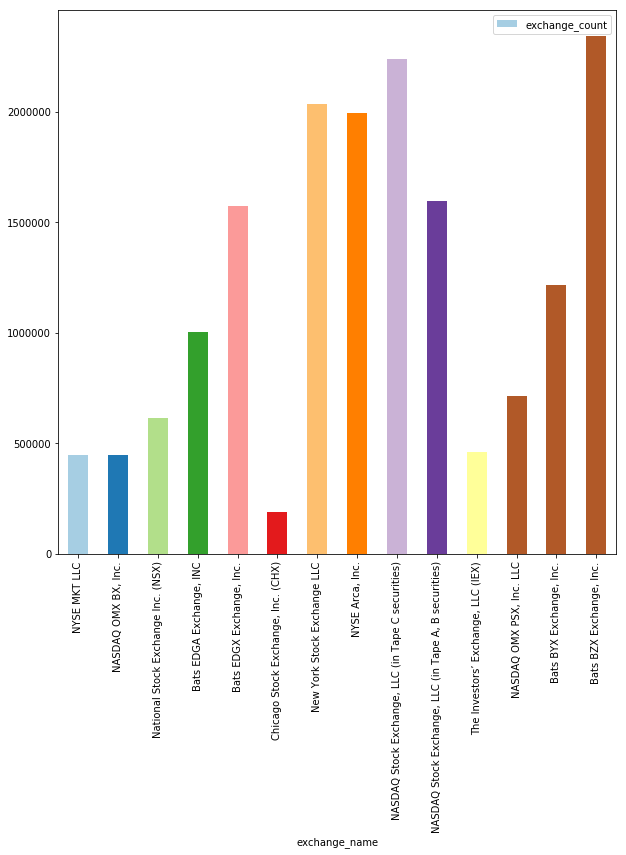

In [9]:
exchange_dictionary = {"A" : "NYSE MKT LLC",
"B" : "NASDAQ OMX BX, Inc.",
"C" : "National Stock Exchange Inc. (NSX)",
"D" : "Financial Industry Regulatory Authority, Inc. (FINRA ADF)",
"I" : "International Securities Exchange, LLC (ISE)",
"J" : "Bats EDGA Exchange, INC",
"K" : "Bats EDGX Exchange, Inc.",
"M" : "Chicago Stock Exchange, Inc. (CHX)",
"N" : "New York Stock Exchange LLC",
"P" : "NYSE Arca, Inc.",
"S" : "ConsolidatedTape System",
"T" : "NASDAQ Stock Exchange, LLC (in Tape A, B securities)",
"Q" : "NASDAQ Stock Exchange, LLC (in Tape C securities)",
"V" : "The Investors’ Exchange, LLC (IEX)",
"W" : "Chicago Broad Options Exchange, Inc.(CBOE)",
"X" : "NASDAQ OMX PSX, Inc. LLC",
"Y" : "Bats BYX Exchange, Inc.",
"Z" : "Bats BZX Exchange, Inc."}

quotes_distribution_exchange = pd.DataFrame(quotes_df.groupby("EX").size())
quotes_distribution_exchange.reset_index(level=0, inplace=True)
quotes_distribution_exchange.columns = ["exchange","exchange_count"]
quotes_distribution_exchange["exchange_name"] = quotes_distribution_exchange["exchange"].apply(lambda e : exchange_dictionary[e])
quotes_distribution_exchange["exchange_percentage"] = quotes_distribution_exchange["exchange_count"].apply(lambda e : round((e/quotes_df.shape[0])*100) )

quotes_distribution_exchange.plot.bar(x='exchange_name', y='exchange_count',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_distribution_exchange.shape[0])),figsize=(10,10))
quotes_distribution_exchange.head(20)



## ***3. Outlier Detection,Removal & Analysis***

In [75]:
from scipy import stats

def segregate_data(parameter,feature,ind_var,df):
    ''' parameter: attribute upon which split occurs e.g company_name("SYM_ROOT")
      feature: attribute whose values are recorded across the parameter e.g "ASK"
      ind_var : independent variable e.g time("TIME_M")
      df: data frame of interest
    '''
    parameter_list = list(df[parameter].unique())
    feature_list = [df[df[parameter]== param_value][feature].values for param_value in parameter_list]
    ind_list =   [df[df[parameter]==param_value][ind_var].values for param_value in parameter_list]
    return (feature_list,ind_list)

def remove_outliers(feature,df,numerical_columns):
    '''feature : attribute on which outliers are removed'''
    
    parameter_list = df[feature].unique()
    z_threshold = 3
    df_list = [df[df[feature]==param][(np.abs(stats.zscore(df[df[feature]==param]
            [numerical_columns] )) < 3).all(axis=1)] for param in parameter_list]
    df_outliers_removed = pd.concat(df_list).reset_index()
    return df_outliers_removed
   

quotes_df_filtered = remove_outliers("SYM_ROOT",quotes_df,["BID","BIDSIZ","ASK","ASKSIZ"])
quotes_df_filtered = quotes_df_filtered[(quotes_df_filtered!=0).all(1)]

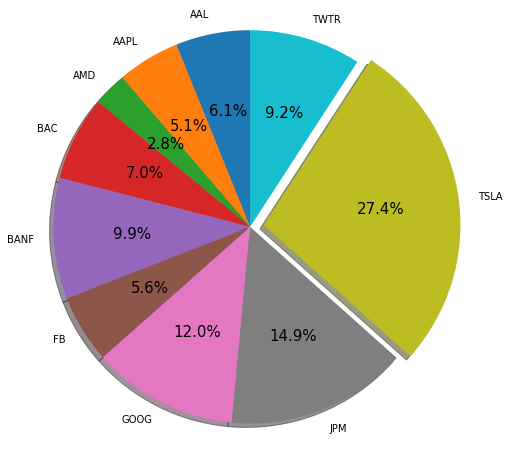

,company,before_outliers,after_outliers,difference,percent_removed
0,AAL,1081231,1050588,30643,2.834084
1,AAPL,2156593,2105217,51376,2.382276
2,AMD,2333087,2303204,29883,1.280835
3,BAC,3377314,3268561,108753,3.220103
4,BANF,66050,63012,3038,4.599546
5,FB,1326960,1292530,34430,2.594652
6,GOOG,2071950,1957184,114766,5.539033
7,JPM,1751197,1630564,120633,6.888602
8,TSLA,628555,548725,79830,12.700559
9,TWTR,2074805,1986712,88093,4.245845


In [76]:
quotes_distribution = pd.DataFrame(quotes_df.groupby("SYM_ROOT").size())
quotes_distribution_filtered = pd.DataFrame(quotes_df_filtered.groupby("SYM_ROOT").size())
quotes_combined = pd.concat([quotes_distribution, quotes_distribution_filtered], axis=1)
quotes_combined.reset_index(level=0, inplace=True)
quotes_combined.columns = ["company","before_outliers","after_outliers"]
quotes_combined["difference"] = quotes_combined["before_outliers"] - quotes_combined["after_outliers"]
quotes_combined["percent_removed"] = 100*quotes_combined["difference"]/quotes_combined["before_outliers"]

explode = (0, 0, 0,0,0,0,0,0,0.07,0) 
fig_dims = (8, 8)
fig1, ax1 = plt.subplots(figsize=fig_dims)
ax1.pie(quotes_combined['percent_removed'].values, explode=explode, labels=quotes_combined['company'].values, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 15})
ax1.axis('equal') 

plt.show()
quotes_combined.head(20)

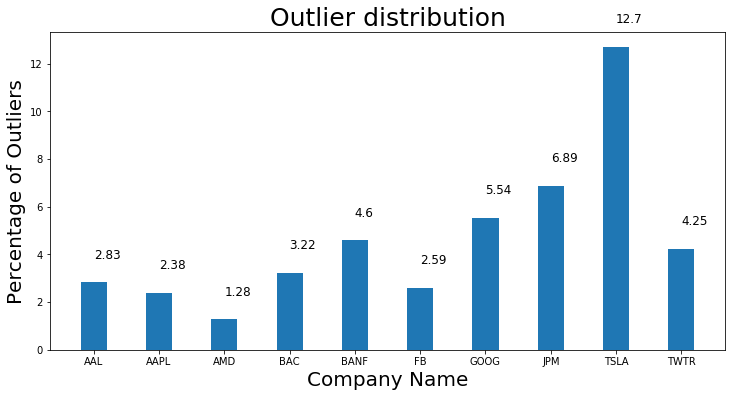

In [77]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(list(quotes_combined['company'].values),list(quotes_combined['percent_removed'].values),width=0.4)
for index,data in enumerate(list(quotes_combined['percent_removed'].values)):
         plt.text(x=index , y =data+1 , s='{0}'.format(round(data,2)), fontdict=dict(fontsize=12))  

plt.tight_layout()
plt.xlabel("Company Name",fontdict=dict(fontsize=20))
plt.ylabel("Percentage of Outliers",fontdict=dict(fontsize=20))
plt.title("Outlier distribution",fontdict=dict(fontsize=25))
plt.show()

## ***4. Average Distribution Analysis***

,index,DATE,BID,BIDSIZ,ASK,ASKSIZ,company
SYM_ROOT,,,,,,,
AAL,5.400026e+05,20200224.0,25.324918,7.854230,25.379798,6.930813,AAL
AAPL,2.163072e+06,20200224.0,299.412346,1.820004,300.611592,1.659986,AAPL
AMD,4.405230e+06,20200224.0,49.255614,4.644270,49.439892,5.172935,AMD
BAC,7.233578e+06,20200224.0,32.830904,83.413568,32.848380,88.095345,BAC
BANF,8.981424e+06,20200224.0,54.379733,1.448184,60.325868,1.250413,BANF
FB,9.679514e+06,20200224.0,200.311976,1.654747,201.144731,1.505936,FB
GOOG,1.138958e+07,20200224.0,1416.073006,1.125110,1431.476514,1.075596,GOOG
JPM,1.328257e+07,20200224.0,132.219503,2.545642,132.421780,2.219989,JPM
TSLA,1.447959e+07,20200224.0,836.026860,1.611893,847.842573,1.365957,TSLA


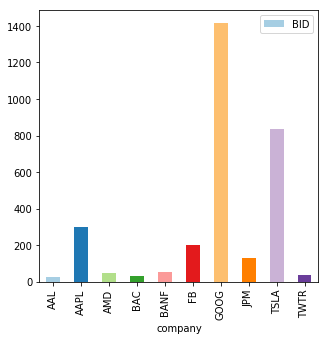

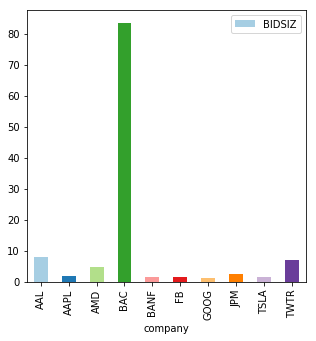

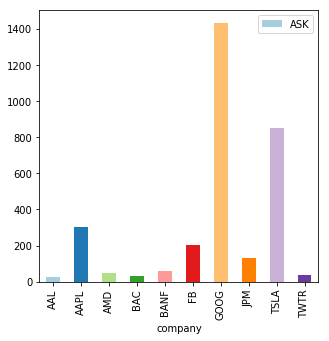

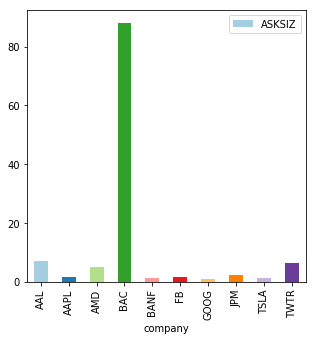

In [52]:
quotes_avg = quotes_df_filtered.groupby("SYM_ROOT").mean()
quotes_avg['company'] =quotes_avg.index
quotes_avg.reset_index(drop=True)

quotes_avg.plot.bar(x='company', y='BID',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_avg.plot.bar(x='company', y='BIDSIZ',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_avg.plot.bar(x='company', y='ASK',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_avg.plot.bar(x='company', y='ASKSIZ',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_avg.head(20)

# ***5. Max Distribution Analysis***

,ASK,company
SYM_ROOT,,
AAL,28.04,AAL
AAPL,330.00,AAPL
AMD,51.68,AMD
BAC,37.84,BAC
BANF,4294.67,BANF
FB,234.00,FB
GOOG,1701.00,GOOG
JPM,157.65,JPM
TSLA,1069.00,TSLA


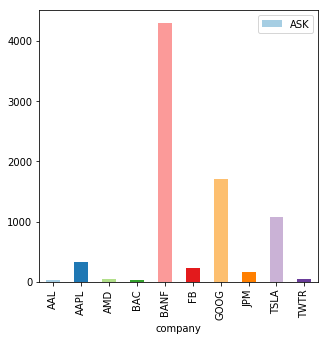

In [56]:
quotes_max = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['ASK'].max())
quotes_max['company'] =quotes_max.index
quotes_max.plot.bar(x='company', y='ASK',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_max.head(20)

,BID,company
SYM_ROOT,,
AAL,26.97,AAL
AAPL,304.10,AAPL
AMD,50.50,AMD
BAC,33.40,BAC
BANF,57.50,BANF
FB,204.93,FB
GOOG,1450.00,GOOG
JPM,133.18,JPM
TSLA,873.50,TSLA


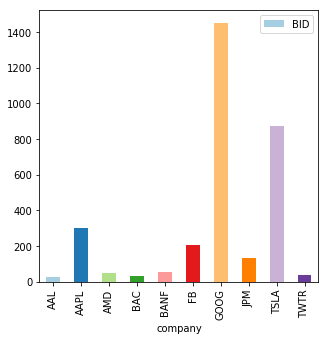

In [57]:
quotes_max = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['BID'].max())
quotes_max['company'] =quotes_max.index
quotes_max.plot.bar(x='company', y='BID',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_max.head(20)

,ASKSIZ,company
SYM_ROOT,,
AAL,87,AAL
AAPL,62,AAPL
AMD,172,AMD
BAC,438,BAC
BANF,3,BANF
FB,10,FB
GOOG,3,GOOG
JPM,8,JPM
TSLA,10,TSLA


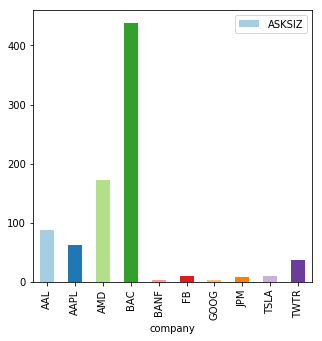

In [58]:
quotes_max = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['ASKSIZ'].max())
quotes_max['company'] =quotes_max.index
quotes_max.plot.bar(x='company', y='ASKSIZ',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_max.head(20)

,BIDSIZ,company
SYM_ROOT,,
AAL,207,AAL
AAPL,50,AAPL
AMD,96,AMD
BAC,402,BAC
BANF,4,BANF
FB,59,FB
GOOG,3,GOOG
JPM,26,JPM
TSLA,12,TSLA


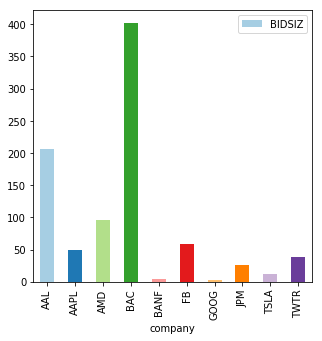

In [59]:
quotes_max = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['BIDSIZ'].max())
quotes_max['company'] =quotes_max.index
quotes_max.plot.bar(x='company', y='BIDSIZ',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_max.head(20)

# ***6. Min Distribution Analysis***

,ASK,company
SYM_ROOT,,
AAL,25.01,AAL
AAPL,289.30,AAPL
AMD,47.50,AMD
BAC,24.46,BAC
BANF,56.93,BANF
FB,198.20,FB
GOOG,1408.99,GOOG
JPM,130.40,JPM
TSLA,822.78,TSLA


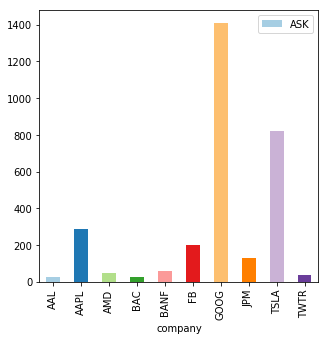

In [60]:
quotes_min = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['ASK'].min())
quotes_min['company'] =quotes_min.index
quotes_min.plot.bar(x='company', y='ASK',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_min

,BID,company
SYM_ROOT,,
AAL,24.1300,AAL
AAPL,213.4600,AAPL
AMD,45.0000,AMD
BAC,0.0001,BAC
BANF,38.6000,BANF
FB,160.0000,FB
GOOG,1180.0000,GOOG
JPM,120.0000,JPM
TSLA,415.0000,TSLA


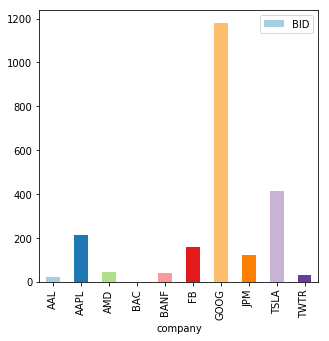

In [61]:
quotes_min = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['BID'].min())
quotes_min['company'] =quotes_min.index
quotes_min.plot.bar(x='company', y='BID',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_min

,ASKSIZ,company
SYM_ROOT,,
AAL,1,AAL
AAPL,1,AAPL
AMD,1,AMD
BAC,1,BAC
BANF,1,BANF
FB,1,FB
GOOG,1,GOOG
JPM,1,JPM
TSLA,1,TSLA


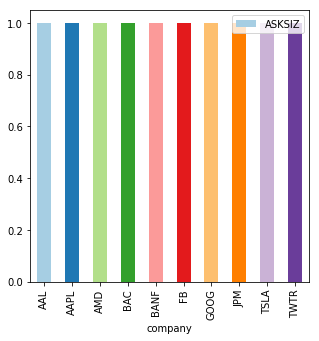

In [62]:
quotes_min = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['ASKSIZ'].min())
quotes_min['company'] =quotes_min.index
quotes_min.plot.bar(x='company', y='ASKSIZ',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_min

,BIDSIZ,company
SYM_ROOT,,
AAL,1,AAL
AAPL,1,AAPL
AMD,1,AMD
BAC,1,BAC
BANF,1,BANF
FB,1,FB
GOOG,1,GOOG
JPM,1,JPM
TSLA,1,TSLA


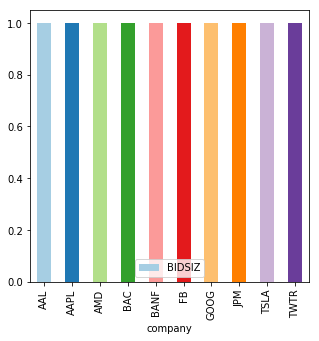

In [63]:
quotes_min = pd.DataFrame(quotes_df_filtered.groupby(['SYM_ROOT'], sort=False)['BIDSIZ'].min())
quotes_min['company'] =quotes_min.index
quotes_min.plot.bar(x='company', y='BIDSIZ',rot=90,
                                      color=plt.cm.Paired(np.arange(quotes_avg.shape[0])),figsize=(5,5))
quotes_min

# ***Trades Analysis***

In [65]:
trades_df.head(10)

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,SIZE,PRICE
0,20200224,4:00:00.051494462,P,AAL,NaN,300,27.30
1,20200224,4:01:38.880578257,P,AAL,NaN,40,27.13
2,20200224,4:01:38.880578428,P,AAL,NaN,40,27.02
3,20200224,4:01:38.880578603,P,AAL,NaN,2,27.00
4,20200224,4:01:38.880578718,P,AAL,NaN,18,26.97
5,20200224,4:23:25.220176411,P,AAL,NaN,12,26.97
6,20200224,4:23:25.220176623,P,AAL,NaN,10,26.62
7,20200224,4:23:25.220176789,P,AAL,NaN,280,26.62
8,20200224,4:23:25.220176947,P,AAL,NaN,430,26.61
9,20200224,4:23:25.224211751,P,AAL,NaN,100,26.59


## ***1. Distribution of Trades Per Company***

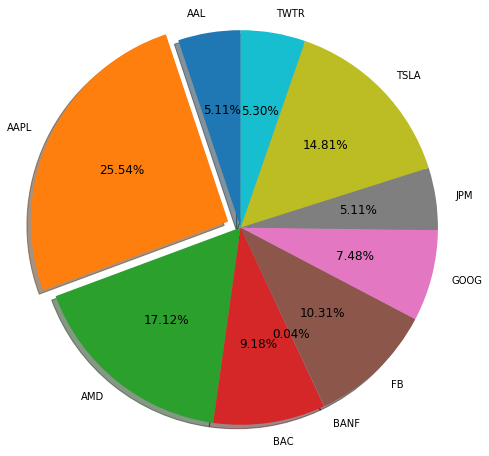

,company,stocks_count,stocks_percentage
0,AAL,117506,5.114324
1,AAPL,586905,25.544419
2,AMD,393352,17.120230
3,BAC,210825,9.175935
4,BANF,815,0.035472
5,FB,236941,10.312606
6,GOOG,171962,7.484464
7,JPM,117301,5.105402
8,TSLA,340321,14.812111
9,TWTR,121658,5.295036


In [71]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from __future__ import division

trades_distribution = pd.DataFrame(trades_df.groupby("SYM_ROOT").size())
trades_distribution.reset_index(level=0, inplace=True)
trades_distribution.columns = ["company","stocks_count"]
trades_distribution["stocks_percentage"] = trades_distribution["stocks_count"].apply(lambda t : (100*t/trades_df.shape[0]))

explode = (0, 0.07, 0,0,0,0,0,0,0,0) 
fig_dims = (8, 8)
fig1, ax1 = plt.subplots(figsize=fig_dims)
ax1.pie(trades_distribution['stocks_percentage'].values, explode=explode, labels=trades_distribution['company'].values, autopct='%1.2f%%',
        shadow=True, startangle=90,textprops={'fontsize': 12})
ax1.axis('equal') 

plt.show()

trades_distribution.head(15)

## ***2. Distribution of Trades Per Exchange***

,exchange,exchange_count,exchange_name,exchange_percentage
0,A,11338,NYSE MKT LLC,0.0
1,B,40626,"NASDAQ OMX BX, Inc.",2.0
2,C,24587,National Stock Exchange Inc. (NSX),1.0
3,D,776847,"Financial Industry Regulatory Authority, Inc. ...",34.0
4,J,57562,"Bats EDGA Exchange, INC",3.0
5,K,169901,"Bats EDGX Exchange, Inc.",7.0
6,M,3578,"Chicago Stock Exchange, Inc. (CHX)",0.0
7,N,67441,New York Stock Exchange LLC,3.0
8,P,204341,"NYSE Arca, Inc.",9.0
9,Q,564429,"NASDAQ Stock Exchange, LLC (in Tape C securities)",25.0


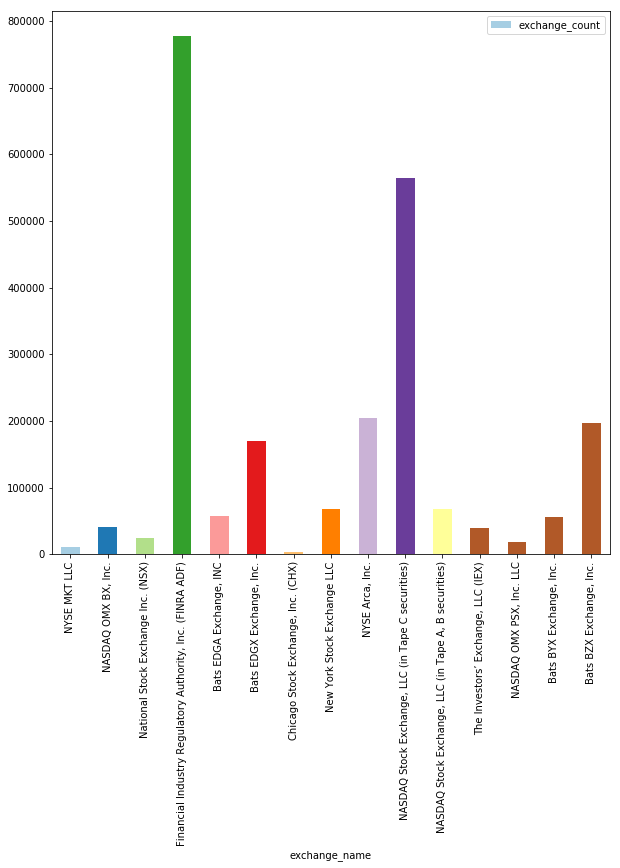

In [72]:
trades_distribution_exchange = pd.DataFrame(trades_df.groupby("EX").size())
trades_distribution_exchange.reset_index(level=0, inplace=True)
trades_distribution_exchange.columns = ["exchange","exchange_count"]
trades_distribution_exchange["exchange_name"] = trades_distribution_exchange["exchange"].apply(lambda e : exchange_dictionary[e])
trades_distribution_exchange["exchange_percentage"] = trades_distribution_exchange["exchange_count"].apply(lambda e : round((e/trades_df.shape[0])*100) )

trades_distribution_exchange.plot.bar(x='exchange_name', y='exchange_count',rot=90,
                                      color=plt.cm.Paired(np.arange(trades_distribution_exchange.shape[0])),figsize=(10,10))
trades_distribution_exchange.head(20)


## ***3. Outlier Detection,Removal & Analysis***

In [78]:
trades_df_filtered = remove_outliers("SYM_ROOT",trades_df,["SIZE","PRICE"])
trades_df_filtered = trades_df_filtered[(trades_df_filtered!=0).all(1)]

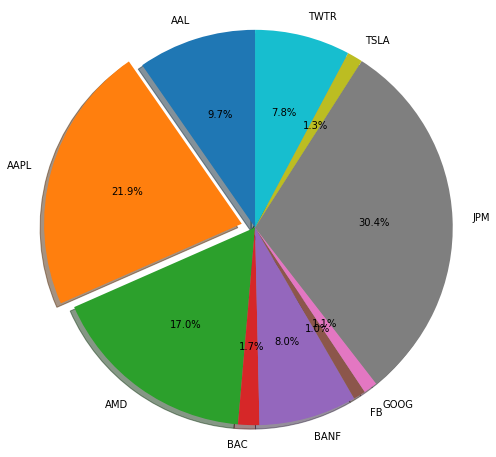

,company,before_outliers,after_outliers,difference,percent_removed
0,AAL,117506,116286,1220,1.038245
1,AAPL,586905,573092,13813,2.353533
2,AMD,393352,386165,7187,1.827117
3,BAC,210825,210432,393,0.186411
4,BANF,815,808,7,0.858896
5,FB,236941,236686,255,0.107622
6,GOOG,171962,171751,211,0.122702
7,JPM,117301,113470,3831,3.265957
8,TSLA,340321,339856,465,0.136636
9,TWTR,121658,120640,1018,0.836772


In [81]:
trades_distribution = pd.DataFrame(trades_df.groupby("SYM_ROOT").size())
trades_distribution_filtered = pd.DataFrame(trades_df_filtered.groupby("SYM_ROOT").size())
trades_combined = pd.concat([trades_distribution, trades_distribution_filtered], axis=1)
trades_combined.reset_index(level=0, inplace=True)
trades_combined.columns = ["company","before_outliers","after_outliers"]
trades_combined["difference"] = trades_combined["before_outliers"] - trades_combined["after_outliers"]
trades_combined["percent_removed"] = 100*trades_combined["difference"]/trades_combined["before_outliers"]

explode = (0, 0.07, 0,0,0,0,0,0,0,0) 
fig_dims = (8, 8)
fig1, ax1 = plt.subplots(figsize=fig_dims)
ax1.pie(trades_combined['percent_removed'].values, explode=explode, labels=trades_combined['company'].values, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 10})
ax1.axis('equal') 

plt.show()
trades_combined.head(20)

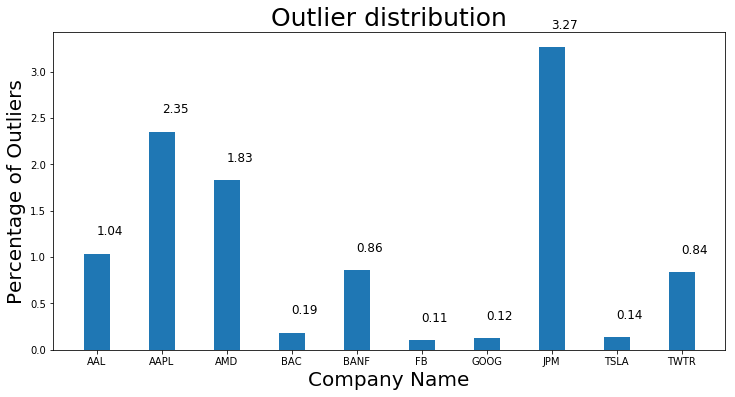

In [84]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(list(trades_combined['company'].values),list(trades_combined['percent_removed'].values),width=0.4)
for index,data in enumerate(list(trades_combined['percent_removed'].values)):
         plt.text(x=index , y =data+0.2 , s='{0}'.format(round(data,2)), fontdict=dict(fontsize=12))  
plt.tight_layout()
plt.xlabel("Company Name",fontdict=dict(fontsize=20))
plt.ylabel("Percentage of Outliers",fontdict=dict(fontsize=20))
plt.title("Outlier distribution",fontdict=dict(fontsize=25))
plt.show()

## ***4. Average Distribution Analysis***

,index,DATE,SIZE,PRICE,company
SYM_ROOT,,,,,
AAL,5.933763e+04,20200224.0,165.867671,25.345787,AAL
AAPL,4.167980e+05,20200224.0,83.067544,299.902000,AAPL
AMD,9.042305e+05,20200224.0,203.268489,49.313462,AMD
BAC,1.202983e+06,20200224.0,311.307938,32.779541,BAC
BANF,1.308994e+06,20200224.0,34.759901,57.204423,BANF
FB,1.427983e+06,20200224.0,82.523783,200.886459,FB
GOOG,1.632397e+06,20200224.0,25.224959,1425.006983,GOOG
JPM,1.775042e+06,20200224.0,98.454464,132.323734,JPM
TSLA,2.005875e+06,20200224.0,41.695445,842.716925,TSLA


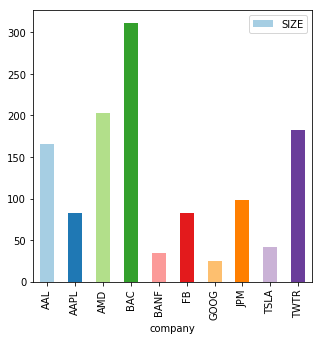

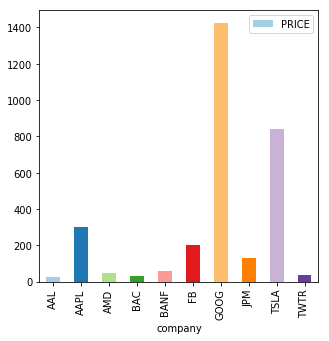

In [86]:
trades_avg = trades_df_filtered.groupby("SYM_ROOT").mean()
trades_avg['company'] =trades_avg.index
trades_avg.reset_index(drop=True)

trades_avg.plot.bar(x='company', y='SIZE',rot=90,
                                      color=plt.cm.Paired(np.arange(trades_avg.shape[0])),figsize=(5,5))
trades_avg.plot.bar(x='company', y='PRICE',rot=90,
                                      color=plt.cm.Paired(np.arange(trades_avg.shape[0])),figsize=(5,5))
trades_avg.head(20)

## *5. Max Distribution Analysis*

,PRICE,company
SYM_ROOT,,
AAL,26.0100,AAL
AAPL,304.1800,AAPL
AMD,50.7000,AMD
BAC,34.3600,BAC
BANF,57.6675,BANF
FB,204.8100,FB
GOOG,1444.1600,GOOG
JPM,138.1000,JPM
TSLA,871.5400,TSLA


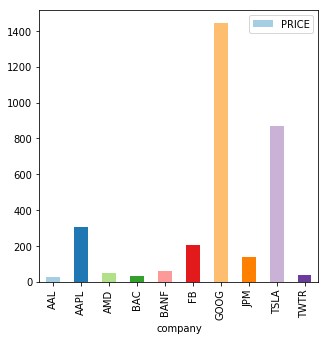

In [90]:
trades_max = pd.DataFrame(trades_df_filtered.groupby(['SYM_ROOT'], sort=False)['PRICE'].max())
trades_max['company'] =trades_max.index
trades_max.plot.bar(x='company', y='PRICE',rot=90,
                                      color=plt.cm.Paired(np.arange(trades_avg.shape[0])),figsize=(5,5))
trades_max.head(20)

,SIZE,company
SYM_ROOT,,
AAL,10678,AAL
AAPL,17256,AAPL
AMD,15300,AMD
BAC,79200,BAC
BANF,500,BANF
FB,17981,FB
GOOG,2616,GOOG
JPM,31327,JPM
TSLA,1520,TSLA


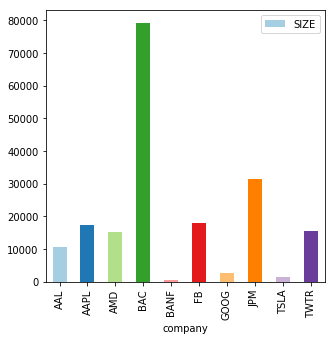

In [91]:
trades_max = pd.DataFrame(trades_df_filtered.groupby(['SYM_ROOT'], sort=False)['SIZE'].max())
trades_max['company'] =trades_max.index
trades_max.plot.bar(x='company', y='SIZE',rot=90,
                                      color=plt.cm.Paired(np.arange(trades_avg.shape[0])),figsize=(5,5))
trades_max.head(20)

## *6. Max Distribution Analysis*

,PRICE,company
SYM_ROOT,,
AAL,25.0000,AAL
AAPL,292.4250,AAPL
AMD,47.8237,AMD
BAC,24.4300,BAC
BANF,56.8200,BANF
FB,198.1700,FB
GOOG,1406.4200,GOOG
JPM,130.2500,JPM
TSLA,822.2000,TSLA


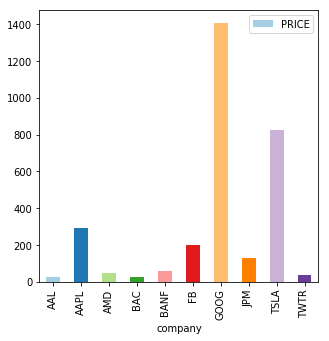

In [92]:
trades_min = pd.DataFrame(trades_df_filtered.groupby(['SYM_ROOT'], sort=False)['PRICE'].min())
trades_min['company'] =trades_min.index
trades_min.plot.bar(x='company', y='PRICE',rot=90,
                                      color=plt.cm.Paired(np.arange(trades_avg.shape[0])),figsize=(5,5))
trades_min

,SIZE,company
SYM_ROOT,,
AAL,1,AAL
AAPL,1,AAPL
AMD,1,AMD
BAC,1,BAC
BANF,1,BANF
FB,1,FB
GOOG,1,GOOG
JPM,1,JPM
TSLA,1,TSLA


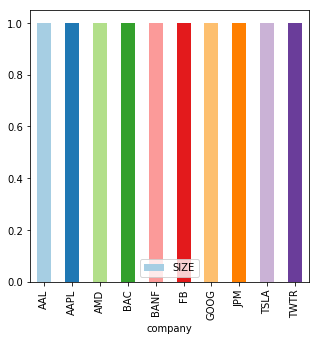

In [93]:
trades_min = pd.DataFrame(trades_df_filtered.groupby(['SYM_ROOT'], sort=False)['SIZE'].min())
trades_min['company'] =trades_min.index
trades_min.plot.bar(x='company', y='SIZE',rot=90,
                                      color=plt.cm.Paired(np.arange(trades_avg.shape[0])),figsize=(5,5))
trades_min

## ***Minutes to Minutes (Quote Dataset)***

In [100]:
quotes_min = quotes_df_filtered
quotes_min["min_to_min"] = quotes_df_filtered["TIME_M"].apply(lambda t : t[:t.rfind(":")])
quotes_min_avg_bid_ask = quotes_min.groupby(["SYM_ROOT","min_to_min"])["BID","ASK"].mean().reset_index()
quotes_min_avg_bidsize_asksize = quotes_min.groupby(["SYM_ROOT","min_to_min"])["BIDSIZ","ASKSIZ"].sum().reset_index()

quotes_min_combined = pd.DataFrame({"company":list(quotes_min_avg_bid_ask["SYM_ROOT"]),
                                   "min_to_min":list(quotes_min_avg_bid_ask["min_to_min"]),
                                    "bid" :  list(quotes_min_avg_bid_ask["BID"]),
                                   "ask": list(quotes_min_avg_bid_ask["ASK"]),
                                   "bidsize": list(quotes_min_avg_bidsize_asksize["BIDSIZ"]),
                                   "asksize": list(quotes_min_avg_bidsize_asksize["ASKSIZ"])})
quotes_min_combined

,ask,asksize,bid,bidsize,company,min_to_min
0,25.547724,22951,25.473225,25543,AAL,10:00
1,25.636728,29105,25.563507,42702,AAL,10:01
2,25.547279,26107,25.484577,35892,AAL,10:02
3,25.579668,20441,25.507612,22389,AAL,10:03
4,25.541688,20623,25.490098,25536,AAL,10:04
5,25.442169,21400,25.390645,34206,AAL,10:05
6,25.447614,11438,25.398981,15753,AAL,10:06
7,25.507875,15309,25.443916,17972,AAL,10:07
8,25.506609,16421,25.445844,24781,AAL,10:08
9,25.437144,23638,25.383981,27338,AAL,10:09


## ***Underline Distribution(Quotes)***

In [172]:
!pip3 install seaborn==0.9.0

  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import seaborn as sns
sns.set()
sns.distplot(quotes_min_combined, x="ask", hue="company", kind="kde")

## ***Minutes to Minutes (Trades Dataset)***

In [102]:
trades_min = trades_df_filtered
trades_min["min_to_min"] = trades_df_filtered["TIME_M"].apply(lambda t : t[:t.rfind(":")])
trades_min_avg_price = trades_min.groupby(["SYM_ROOT","min_to_min"])["PRICE"].mean().reset_index()
trades_min_avg_size = trades_min.groupby(["SYM_ROOT","min_to_min"])["SIZE"].sum().reset_index()

trades_min_combined = pd.DataFrame({"company":list(trades_min_avg_price["SYM_ROOT"]),
                                   "min_to_min":list(trades_min_avg_price["min_to_min"]),
                                    "price" :  list(trades_min_avg_price["PRICE"]),
                                   "size": list(trades_min_avg_size["SIZE"]),
                                   })
trades_min_combined

,company,min_to_min,price,size
0,AAL,10:00,25.493290,89736
1,AAL,10:01,25.583199,182288
2,AAL,10:02,25.513445,88961
3,AAL,10:03,25.533147,63363
4,AAL,10:04,25.514240,66362
5,AAL,10:05,25.418199,100334
6,AAL,10:06,25.418200,39208
7,AAL,10:07,25.470971,43635
8,AAL,10:08,25.469996,52610
9,AAL,10:09,25.409607,89714


## ***Minute to Minute Return***

In [103]:
combined_df = quotes_min
min_min_df = combined_df

'''
min_to_min_return = 100*(bid_max(min=1) - ask_min(min=0))/ask_min(min=0)
'''

idx_ask_min = min_min_df.groupby(["SYM_ROOT","min_to_min"])["ASK"].transform(min) == min_min_df["ASK"]
ask_min = list(min_min_df[idx_ask_min][["ASK","min_to_min","SYM_ROOT"]].drop_duplicates()["ASK"])
idx_bid_max = min_min_df.groupby(["SYM_ROOT","min_to_min"])["BID"].transform(max) == min_min_df["BID"]
bid_max = list(min_min_df[idx_bid_max][["BID","min_to_min","SYM_ROOT"]].drop_duplicates()["BID"])
minutes = list(min_min_df[idx_ask_min][["ASK","min_to_min","SYM_ROOT"]].drop_duplicates()["min_to_min"])
companies = list(min_min_df[idx_ask_min][["ASK","min_to_min","SYM_ROOT"]].drop_duplicates()["SYM_ROOT"])

min_min_return_df = pd.DataFrame({"min_to_min":minutes, "min_ask":ask_min,"max_bid":bid_max,"company":companies})
min_min_return_df

,company,max_bid,min_ask,min_to_min
0,AAL,26.97,27.32,4:00
1,AAL,26.97,27.30,4:01
2,AAL,26.59,27.30,4:04
3,AAL,26.60,27.29,4:05
4,AAL,26.60,27.29,4:06
5,AAL,26.60,27.29,4:07
6,AAL,26.60,27.26,4:08
7,AAL,26.60,27.26,4:09
8,AAL,26.60,27.26,4:10
9,AAL,26.60,27.26,4:11


In [114]:
def get_min_min_return(df,parameter):
    list_df = []
    for param in  df[parameter].unique():
        df_param = df[df[parameter]==param]
        df_param["shift_min_ask"] = df_param["min_ask"].shift(1)
        df_param["min_min_return_percent"] = 100*(df_param["max_bid"] - df_param["shift_min_ask"])/df_param["shift_min_ask"]
        list_df.append(df_param)
    df_min_min_return = pd.concat(list_df).reset_index().dropna()
    return df_min_min_return


df_min_min_return = get_min_min_return(min_min_return_df,"company")
df_min_min_return

    

,index,company,max_bid,min_ask,min_to_min,shift_min_ask,min_min_return_percent
1,1,AAL,26.97,27.30,4:01,27.32,-1.281113
2,2,AAL,26.59,27.30,4:04,27.30,-2.600733
3,3,AAL,26.60,27.29,4:05,27.30,-2.564103
4,4,AAL,26.60,27.29,4:06,27.29,-2.528399
5,5,AAL,26.60,27.29,4:07,27.29,-2.528399
6,6,AAL,26.60,27.26,4:08,27.29,-2.528399
7,7,AAL,26.60,27.26,4:09,27.26,-2.421130
8,8,AAL,26.60,27.26,4:10,27.26,-2.421130
9,9,AAL,26.60,27.26,4:11,27.26,-2.421130
10,10,AAL,26.60,27.26,4:12,27.26,-2.421130


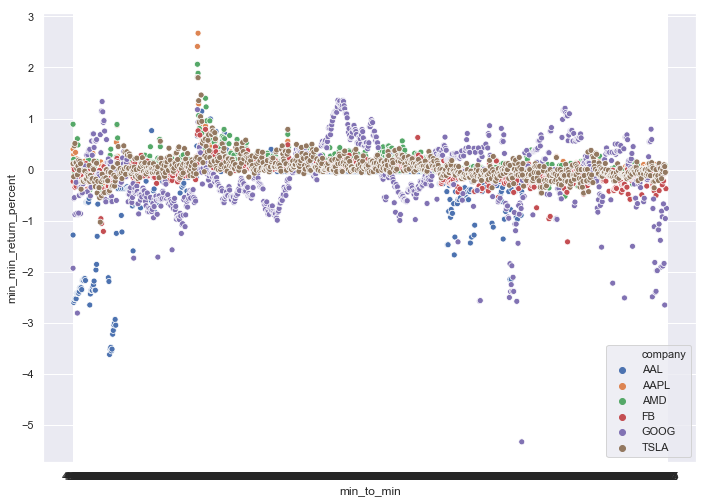

In [128]:
import seaborn as sns

df_min_min_return_filtered = df_min_min_return.loc[(df_min_min_return["company"] != "BANF")
                                                   & (df_min_min_return["company"] != "BAC") 
                                                   & (df_min_min_return["company"] != "TWTR")
                                                  & (df_min_min_return["company"] != "JPM")]
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_min_min_return_filtered, x="min_to_min", y="min_min_return_percent", hue="company")

## ***Combining Quotes & Trades Datasets together***

In [131]:
combined_min = pd.merge(quotes_min_combined, trades_min_combined, 
                  how='left', left_on=['company','min_to_min'], right_on = ['company','min_to_min'])
combined_min

,ask,asksize,bid,bidsize,company,min_to_min,price,size
0,25.547724,22951,25.473225,25543,AAL,10:00,25.493290,89736.0
1,25.636728,29105,25.563507,42702,AAL,10:01,25.583199,182288.0
2,25.547279,26107,25.484577,35892,AAL,10:02,25.513445,88961.0
3,25.579668,20441,25.507612,22389,AAL,10:03,25.533147,63363.0
4,25.541688,20623,25.490098,25536,AAL,10:04,25.514240,66362.0
5,25.442169,21400,25.390645,34206,AAL,10:05,25.418199,100334.0
6,25.447614,11438,25.398981,15753,AAL,10:06,25.418200,39208.0
7,25.507875,15309,25.443916,17972,AAL,10:07,25.470971,43635.0
8,25.506609,16421,25.445844,24781,AAL,10:08,25.469996,52610.0
9,25.437144,23638,25.383981,27338,AAL,10:09,25.409607,89714.0


In [136]:
combined_min["price"].isnull().sum()

1159

## ***Spread,Effective Spread,Depth***

In [138]:
combined_min_detail = combined_min
combined_min_detail["bid_ask_spread"] = combined_min_detail["ask"] - combined_min_detail["bid"]
combined_min_detail["depth"] = combined_min_detail["ask"] + combined_min_detail["bid"]
combined_min_detail["midpoint"] = (combined_min_detail["ask"] + combined_min_detail["bid"])/2
combined_min_detail["effective_spread"] = abs(200* (combined_min_detail["price"]-combined_min_detail["midpoint"])/combined_min_detail["midpoint"])

combined_min_detail


,ask,asksize,bid,bidsize,company,min_to_min,price,size,bid_ask_spread,depth,midpoint,effective_spread
0,25.547724,22951,25.473225,25543,AAL,10:00,25.493290,89736.0,0.074499,51.020949,25.510474,0.134720
1,25.636728,29105,25.563507,42702,AAL,10:01,25.583199,182288.0,0.073221,51.200235,25.600118,0.132173
2,25.547279,26107,25.484577,35892,AAL,10:02,25.513445,88961.0,0.062702,51.031855,25.515928,0.019458
3,25.579668,20441,25.507612,22389,AAL,10:03,25.533147,63363.0,0.072056,51.087280,25.543640,0.082161
4,25.541688,20623,25.490098,25536,AAL,10:04,25.514240,66362.0,0.051590,51.031785,25.515893,0.012951
5,25.442169,21400,25.390645,34206,AAL,10:05,25.418199,100334.0,0.051524,50.832815,25.416407,0.014101
6,25.447614,11438,25.398981,15753,AAL,10:06,25.418200,39208.0,0.048633,50.846595,25.423297,0.040100
7,25.507875,15309,25.443916,17972,AAL,10:07,25.470971,43635.0,0.063960,50.951791,25.475895,0.038660
8,25.506609,16421,25.445844,24781,AAL,10:08,25.469996,52610.0,0.060765,50.952453,25.476226,0.048913
9,25.437144,23638,25.383981,27338,AAL,10:09,25.409607,89714.0,0.053163,50.821125,25.410562,0.007517


## ***Correlation between Spread and Depth (Company-Wise)***

,company,correlation
0,AAL,0.608259
1,AAPL,0.200315
2,AMD,0.177354
3,BAC,0.173427
4,BANF,0.996255
5,FB,0.291547
6,GOOG,0.211007
7,JPM,0.256455
8,TSLA,0.311624
9,TWTR,0.422343


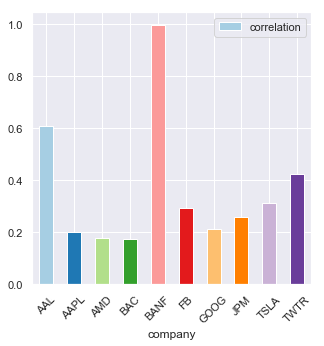

In [150]:
from scipy.stats.stats import pearsonr

param_list = combined_min_detail["company"].unique()
correlation_tuples = [pearsonr(list(combined_min_detail[combined_min_detail["company"]==param]["bid_ask_spread"]),
                    list(combined_min_detail[combined_min_detail["company"]==param]["depth"]))
                    for param in param_list]
correlation_list = [(x**2 + y**2)**(1/2) for (x,y) in correlation_tuples]
correlation_df = pd.DataFrame({"company":param_list, "correlation":correlation_list})
correlation_df.plot.bar(x='company', y='correlation',rot=45,
                                      color=plt.cm.Paired(np.arange(correlation_df.shape[0])),figsize=(5,5))
correlation_df

## ***Volatility***

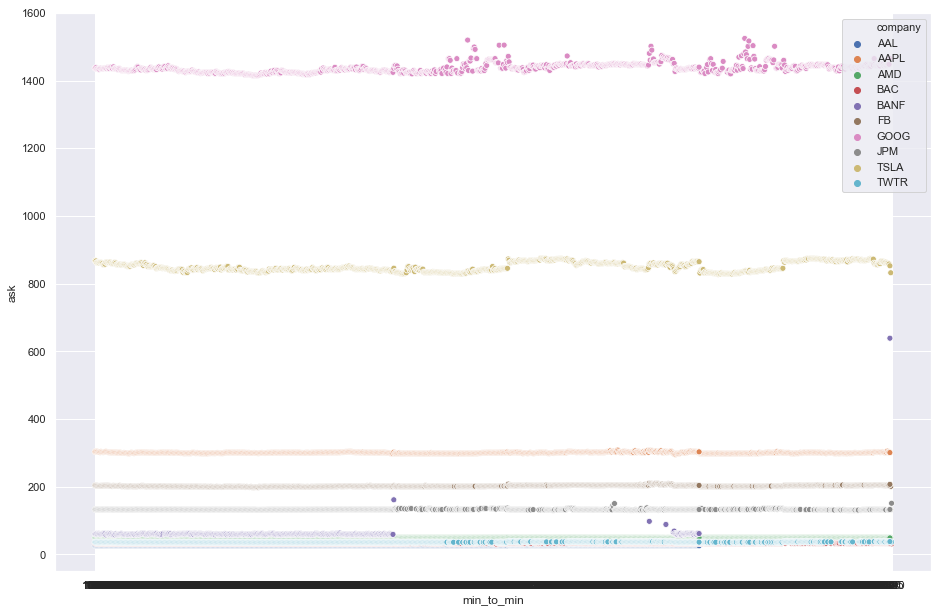

In [157]:
import seaborn as sns

sns.set()
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.scatterplot(data=combined_min_detail, x="min_to_min", y="ask", hue="company")

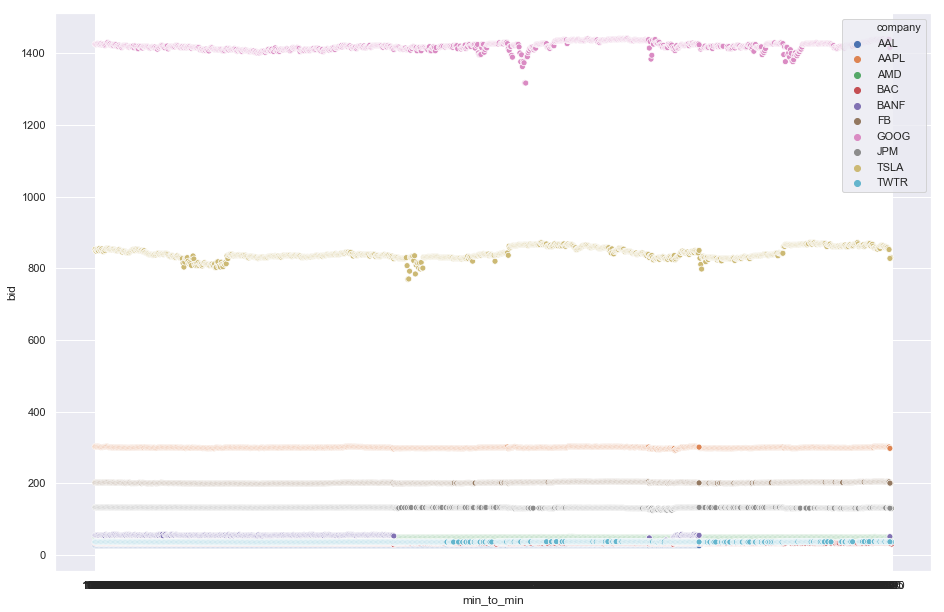

In [158]:
import seaborn as sns

sns.set()
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.scatterplot(data=combined_min_detail, x="min_to_min", y="bid", hue="company")

## ***Trading Volume***

,company,volume
company,,
AAL,AAL,19278954.0
AAPL,AAPL,47605238.0
AMD,AMD,78495176.0
BAC,BAC,65506415.0
BANF,BANF,28086.0
FB,FB,19525026.0
GOOG,GOOG,4331421.0
JPM,JPM,11168710.0
TSLA,TSLA,14170423.0


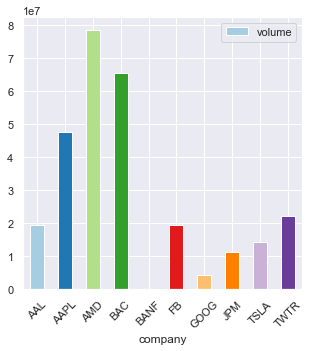

In [155]:
volume_per_company = combined_min_detail.groupby(["company"])["size"].sum()
companies = combined_min_detail["company"].unique()
trading_volume_df = pd.DataFrame({"company":companies, "volume":volume_per_company})

trading_volume_df.plot.bar(x='company', y='volume',rot=45,
                                      color=plt.cm.Paired(np.arange(trading_volume_df.shape[0])),figsize=(5,5))
trading_volume_df

In [154]:
trading_volume_df

,company,volume
company,,
AAL,AAL,19278954.0
AAPL,AAPL,47605238.0
AMD,AMD,78495176.0
BAC,BAC,65506415.0
BANF,BANF,28086.0
FB,FB,19525026.0
GOOG,GOOG,4331421.0
JPM,JPM,11168710.0
TSLA,TSLA,14170423.0


In [171]:
quotes_df_tesla = quotes_df[quotes_df["SYM_ROOT"]=="TSLA"]
quotes_df_tesla.to_csv (r'C:/Users/HP/Documents/StocksAnalysis&Prediction/tesla_quotes.csv', index = False, header=True)
trades_df_tesla = trades_df[trades_df["SYM_ROOT"]=="TSLA"]
trades_df_tesla.to_csv (r'C:/Users/HP/Documents/StocksAnalysis&Prediction/tesla_trades.csv', index = False, header=True)



,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,SYM_ROOT,SYM_SUFFIX
14164382,20200224,4:00:00.049541150,P,666.00,10,0.00,0,TSLA,NaN
14164383,20200224,4:00:00.049541339,P,666.00,10,887.20,2,TSLA,NaN
14164384,20200224,4:00:00.049541521,P,666.00,10,880.00,2,TSLA,NaN
14164385,20200224,4:00:00.050386559,P,677.00,1,880.00,2,TSLA,NaN
14164386,20200224,4:00:00.050386763,P,702.90,1,880.00,2,TSLA,NaN
14164387,20200224,4:00:00.050386971,P,710.00,1,880.00,2,TSLA,NaN
14164388,20200224,4:00:00.050642695,P,719.00,1,880.00,2,TSLA,NaN
14164389,20200224,4:00:00.050642889,P,750.49,1,880.00,2,TSLA,NaN
14164390,20200224,4:00:00.050906904,P,751.00,1,880.00,2,TSLA,NaN
14164391,20200224,4:00:00.050907131,P,770.00,1,880.00,2,TSLA,NaN
